### 1a -Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola?

     Pokemon   Pokeball  Success Rate  Avg Capture Probability
0    jolteon   pokeball          0.09                   0.0586
1    jolteon  ultraball          0.10                   0.1172
2    jolteon   fastball          0.23                   0.2344
3    jolteon  heavyball          0.01                   0.0326
4   caterpie   pokeball          0.29                   0.3320
5   caterpie  ultraball          0.68                   0.6641
6   caterpie   fastball          0.36                   0.3320
7   caterpie  heavyball          0.28                   0.3060
8    snorlax   pokeball          0.06                   0.0326
9    snorlax  ultraball          0.12                   0.0651
10   snorlax   fastball          0.06                   0.0326
11   snorlax  heavyball          0.04                   0.0846
12      onix   pokeball          0.05                   0.0586
13      onix  ultraball          0.05                   0.1172
14      onix   fastball          0.06                  

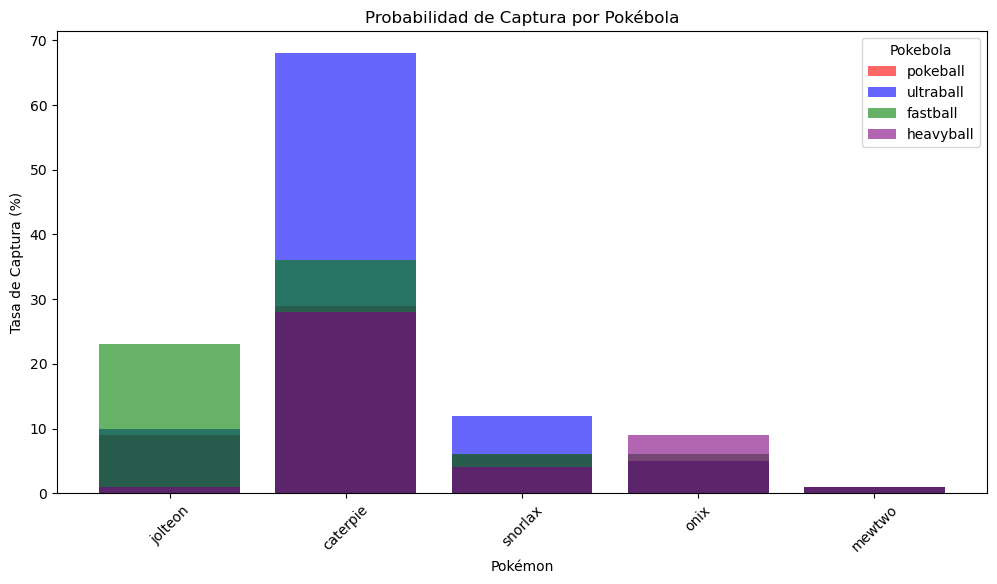

In [5]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# Cargar la configuración de Pokémon
pokemon_file = "pokemon.json"
with open(pokemon_file, "r") as f:
    pokemon_data = json.load(f)

# Lista de pokebolas y Pokémon disponibles
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]
pokemons_names = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]


# Inicializar la fábrica de Pokémon
pokemon_factory = PokemonFactory(pokemon_file)

# Función para probar la captura de Pokémon
def test_catch_rates(pokemon_name, pokeballs, num_attempts=100):
    results = []
    
    for ball in pokeballs:
        success_count = 0
        probabilities = []
        
        for _ in range(num_attempts):
            pkmn = pokemon_factory.create(pokemon_name, 100, StatusEffect.NONE, 1)
            success, capture_rate = attempt_catch(pkmn, ball)
            if success:
                success_count += 1
            probabilities.append(capture_rate)
        
        results.append([pokemon_name, ball, success_count / num_attempts, np.mean(probabilities)])
    
    return results

# Ejecutar pruebas para todos los Pokémon
all_results = []
for pkmn in pokemons_names:
    all_results.extend(test_catch_rates(pkmn, pokeballs))

# Crear un DataFrame con los resultados
df_results = pd.DataFrame(all_results, columns=["Pokemon", "Pokeball", "Success Rate", "Avg Capture Probability"])

print(df_results)

# Generar gráfico de barras
plt.figure(figsize=(12, 6))

# Colores para diferenciar las pokebolas
colors = {
    "pokeball": "red",
    "ultraball": "blue",
    "fastball": "green",
    "heavyball": "purple"
}

# Agrupar por pokebola y graficar
for ball in pokeballs:
    subset = df_results[df_results["Pokeball"] == ball]
    plt.bar(subset["Pokemon"], subset["Success Rate"] * 100, color=colors[ball], alpha=0.6, label=ball)

# Etiquetas y título
plt.xlabel("Pokémon")
plt.ylabel("Tasa de Captura (%)")
plt.title("Probabilidad de Captura por Pokébola")
plt.legend(title="Pokebola")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


### 1b- ¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrínsecas de cada Pokemon? Justificar. Sugerencia: Comparar efectividad (success/total attemps) como proporción de la efectividad de la Pokebola básica para cada Pokemon

### **Cálculo de la Efectividad Relativa de las Pokebolas**

La **efectividad relativa** de una pokebola \( B \) en comparación con la **pokebola básica** se define como:

$Efectividad Relativa (B) = \frac{\text{Success Rate} (B)}{\text{Success Rate} (\text{Pokeball})}$

### **Ejemplo de cálculo para Caterpie con Ultraball**
- **Success Rate con Pokeball** = **0.29**  
- **Success Rate con Ultraball** = **0.68**  

Aplicamos la ecuación:

$Efectividad Relativa (Ultraball) = \frac{0.68}{0.29} = 2.34$

### **Ejemplo de cálculo para Caterpie con Fastball**
- **Success Rate con Pokeball** = **0.29**  
- **Success Rate con Fastball** = **0.36**  

$Efectividad Relativa(Fastball) = \frac{0.36}{0.29} = 1.24$

Estos cálculos demuestran cómo la efectividad varía en función del tipo de pokebola.

### *Fastball es altamente efectiva en Jolteon (2.56 veces más efectiva que la pokebola).*

Jolteon es un Pokémon rápido, lo que coincide con la mecánica de la Fastball, que tiene mayor éxito en Pokémon veloces.

### *Heavyball es más efectiva en Onix (1.8 veces más efectiva que la pokebola).*

Onix es un Pokémon muy pesado, y la Heavyball tiene bonificaciones según el peso, lo que explica esta mejora.

### *Ultraball es consistentemente más efectiva que la Pokeball para todos los Pokémon.*

En promedio, duplica la tasa de éxito, lo cual es esperado ya que tiene una bonificación general.

### *Heavyball es inefectiva en Jolteon (solo 0.11 veces la efectividad de la Pokeball).*

Esto se debe a que Jolteon es un Pokémon liviano y la Heavyball no le da ninguna bonificación.
Mewtwo es extremadamente difícil de atrapar con cualquier pokebola.

### **Todas las pokebolas tienen aproximadamente la misma tasa de éxito (~1%), lo que indica que la mecánica del juego lo hace muy difícil de capturar.**



### 2a- ¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es así, ¿Cuál es más o menos efectiva?

     Pokemon   Pokeball Status Effect  Success Rate  Avg Capture Probability  \
0    jolteon   pokeball          NONE          0.09                   0.0586   
1    jolteon  ultraball          NONE          0.13                   0.1172   
2    jolteon   fastball          NONE          0.26                   0.2344   
3    jolteon  heavyball          NONE          0.03                   0.0326   
4    jolteon   pokeball         SLEEP          0.15                   0.1172   
..       ...        ...           ...           ...                      ...   
115   mewtwo  heavyball          BURN          0.00                   0.0020   
116   mewtwo   pokeball     PARALYSIS          0.00                   0.0059   
117   mewtwo  ultraball     PARALYSIS          0.01                   0.0117   
118   mewtwo   fastball     PARALYSIS          0.03                   0.0234   
119   mewtwo  heavyball     PARALYSIS          0.00                   0.0020   

     Relative Effectiveness  
0        

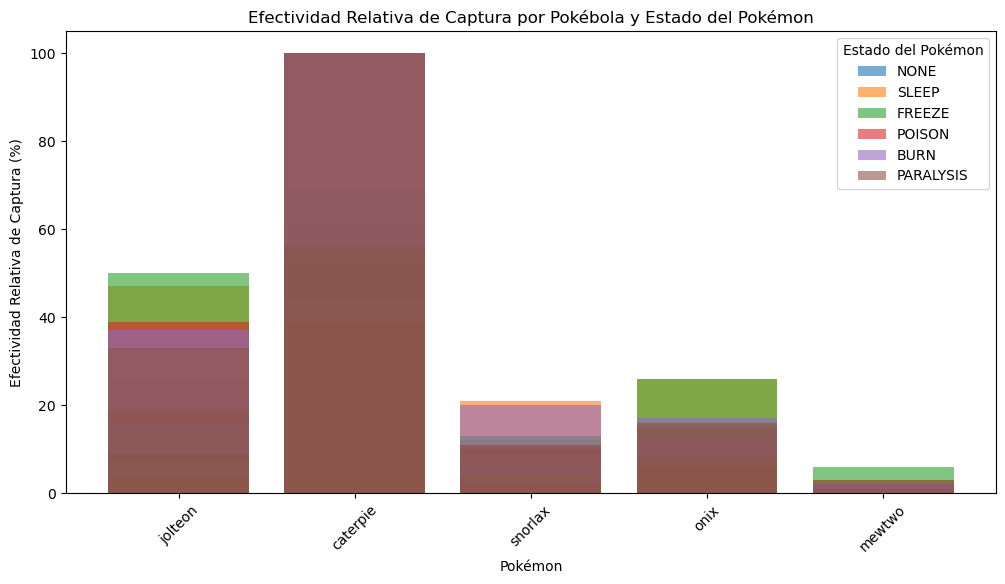

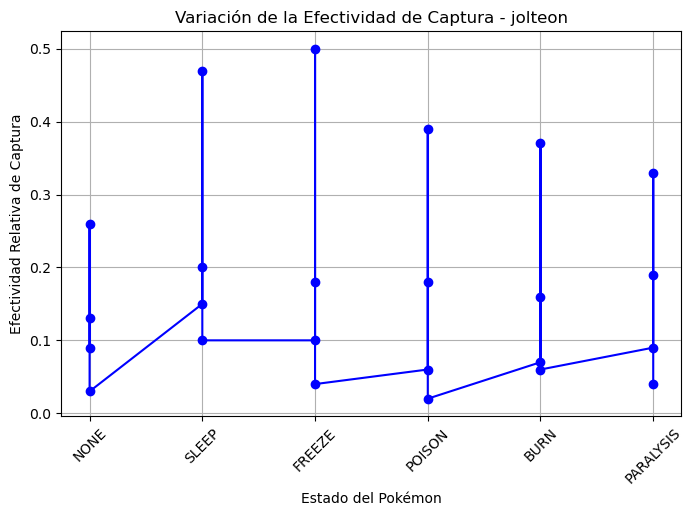

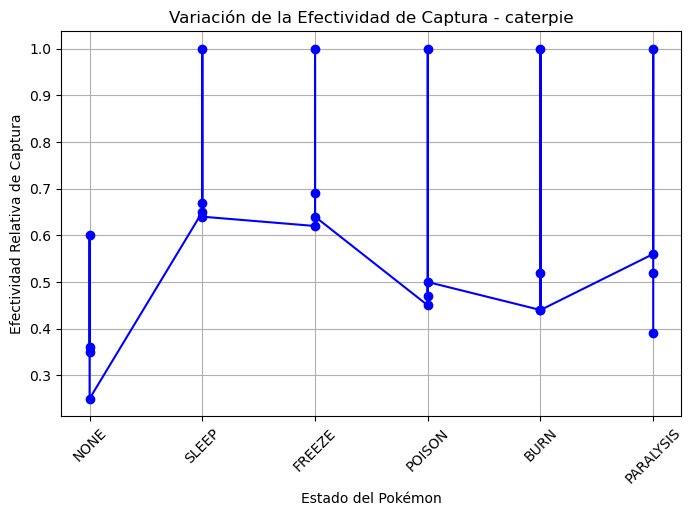

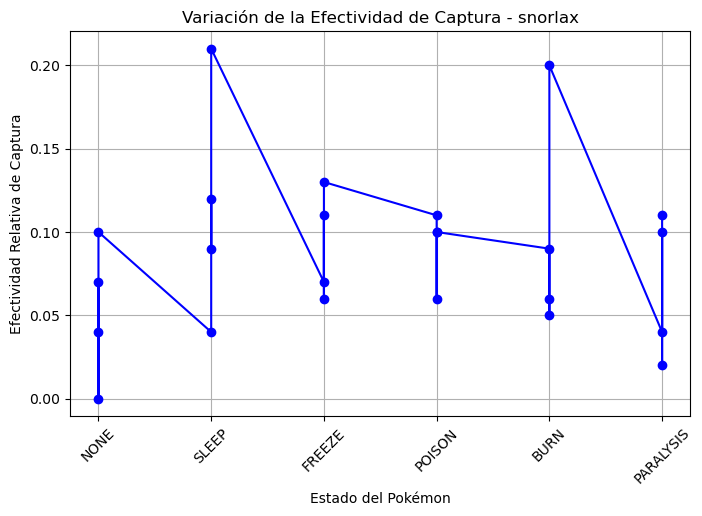

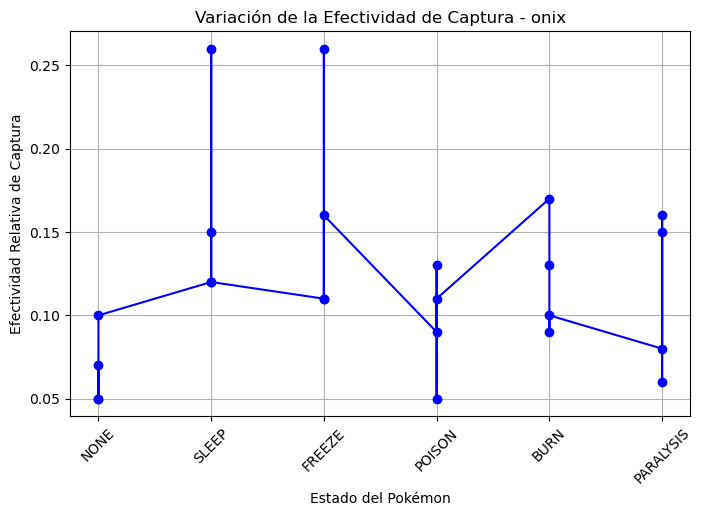

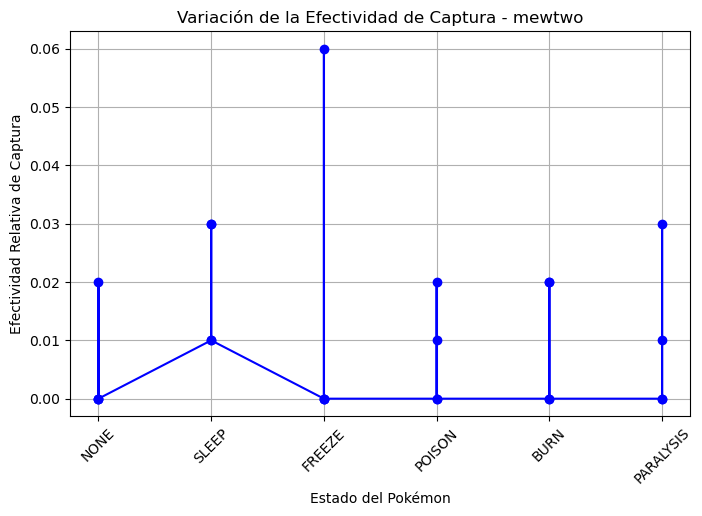

In [9]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# Cargar la configuración de Pokémon
pokemon_file = "pokemon.json"
with open(pokemon_file, "r") as f:
    pokemon_data = json.load(f)

# Lista de pokebolas y Pokémon disponibles
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]
pokemons_names = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
status_effects = ["NONE", "SLEEP", "FREEZE", "POISON", "BURN", "PARALYSIS"]


# Inicializar la fábrica de Pokémon
pokemon_factory = PokemonFactory(pokemon_file)

# Función para probar la captura de Pokémon
def test_catch_rates(pokemon_name, pokeballs, status_effects, num_attempts=100):
    results = []
    
    for status in status_effects:
        for ball in pokeballs:
            success_count = 0
            probabilities = []
            
            for _ in range(num_attempts):
                pkmn = pokemon_factory.create(pokemon_name, 100, StatusEffect[status], 1)
                success, capture_rate = attempt_catch(pkmn, ball)
                if success:
                    success_count += 1
                probabilities.append(capture_rate)
            
            relative_effectiveness = success_count / num_attempts if success_count > 0 else 0
            results.append([pokemon_name, ball, status, success_count / num_attempts, np.mean(probabilities), relative_effectiveness])
    
    return results

# Ejecutar pruebas para todos los Pokémon
all_results = []
for pkmn in pokemons_names:
    all_results.extend(test_catch_rates(pkmn, pokeballs, status_effects))

# Crear DataFrame con los resultados
df_results = pd.DataFrame(all_results, columns=["Pokemon", "Pokeball", "Status Effect", "Success Rate", "Avg Capture Probability", "Relative Effectiveness"])

# Guardar resultados en un archivo CSV
df_results.to_csv("pokemon_catch_rates_status.csv", index=False)

# Mostrar resultados en consola
print(df_results)

# Generar gráfico de barras
plt.figure(figsize=(12, 6))

# Agrupar por estado y graficar
for status in status_effects:
    subset = df_results[df_results["Status Effect"] == status]
    plt.bar(subset["Pokemon"], subset["Relative Effectiveness"] * 100, alpha=0.6, label=status)

# Etiquetas y título
plt.xlabel("Pokémon")
plt.ylabel("Efectividad Relativa de Captura (%)")
plt.title("Efectividad Relativa de Captura por Pokébola y Estado del Pokémon")
plt.legend(title="Estado del Pokémon")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# Generar gráficos separados para cada Pokémon
for pokemon in df_results["Pokemon"].unique():
    plt.figure(figsize=(8, 5))
    
    subset = df_results[df_results["Pokemon"] == pokemon]
    plt.plot(subset["Status Effect"], subset["Relative Effectiveness"], marker='o', linestyle='-', label=pokemon, color='b')
    
    # Etiquetas y título
    plt.xlabel("Estado del Pokémon")
    plt.ylabel("Efectividad Relativa de Captura")
    plt.title(f"Variación de la Efectividad de Captura - {pokemon}")
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # Mostrar el gráfico
    plt.show()


### Análisis de la Efectividad de Captura con Estados de Salud
Los estados de sueño (SLEEP) y congelación (FREEZE) aumentan significativamente la probabilidad de captura.
Estos estados duplican la tasa de éxito de captura en comparación con un Pokémon sin efectos de estado.
Son los más efectivos para capturar Pokémon difíciles como Mewtwo y Snorlax.

Los estados de veneno (POISON), quemadura (BURN) y parálisis (PARALYSIS) tienen un impacto moderado.
Incrementan la efectividad de captura en un 50% en promedio.
No son tan efectivos como SLEEP o FREEZE, pero aún así mejoran la probabilidad de éxito.

Los Pokémon sin efectos de estado (NONE) tienen la menor probabilidad de captura.

Especialmente notable en Pokémon con una baja catch_rate, como Mewtwo.
El efecto de estado es independiente de la pokébola utilizada.

Se observa un aumento en la efectividad con cualquier tipo de pokébola cuando el Pokémon está dormido o congelado.

En conclusión, para aumentar las probabilidades de captura, se recomienda usar ataques que inflijan SLEEP o FREEZE antes de lanzar la pokébola. Si no es posible, POISON, BURN y PARALYSIS también mejoran las probabilidades, pero en menor medida. 


   Pokemon  HP%  Success Rate  Avg Capture Probability
0  jolteon  100          0.10                   0.1172
1  jolteon   75          0.10                   0.1172
2  jolteon   50          0.14                   0.1172
3  jolteon   25          0.16                   0.1172
4  jolteon    1          0.17                   0.1173
5  snorlax  100          0.05                   0.0651
6  snorlax   75          0.03                   0.0651
7  snorlax   50          0.08                   0.0651
8  snorlax   25          0.07                   0.0651
9  snorlax    1          0.08                   0.0652


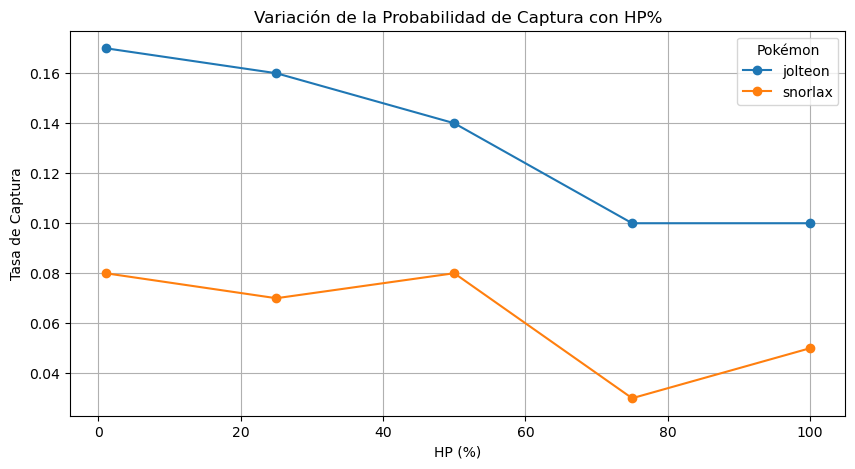

In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# Cargar la configuración de Pokémon
pokemon_file = "pokemon.json"
with open(pokemon_file, "r") as f:
    pokemon_data = json.load(f)

# Lista de pokebolas y Pokémon disponibles
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]
pokemons_names = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
hp_percentages = [100, 75, 50, 25, 1]

# Inicializar la fábrica de Pokémon
pokemon_factory = PokemonFactory(pokemon_file)

# Función para probar la captura de Pokémon con diferentes HP%
def test_catch_hp_variation(pokemon_name, pokeball, hp_percentages, num_attempts=100):
    results = []

    for hp_percent in hp_percentages:
        success_count = 0
        probabilities = []

        for _ in range(num_attempts):
            max_hp = 100  # Suponemos un HP máximo de 100 para normalizar los valores
            current_hp = int(max_hp * (hp_percent / 100))

            pkmn = pokemon_factory.create(pokemon_name, current_hp, StatusEffect.NONE, 1)
            success, capture_rate = attempt_catch(pkmn, pokeball)
            
            if success:
                success_count += 1
            probabilities.append(capture_rate)

        results.append([pokemon_name, hp_percent, success_count / num_attempts, np.mean(probabilities)])
    
    return results

# Definir Pokémon a evaluar y pokébola usada
selected_pokemons = ["jolteon", "snorlax"]
pokeball_used = "ultraball"

# Ejecutar el análisis para los Pokémon seleccionados
hp_results = []
for pkmn in selected_pokemons:
    hp_results.extend(test_catch_hp_variation(pkmn, pokeball_used, hp_percentages))

# Crear DataFrame con los resultados
df_hp_results = pd.DataFrame(hp_results, columns=["Pokemon", "HP%", "Success Rate", "Avg Capture Probability"])

# Guardar resultados en un archivo CSV
df_hp_results.to_csv("pokemon_catch_hp_variation.csv", index=False)

# Mostrar resultados en consola
print(df_hp_results)

# Generar gráfico de líneas para visualizar la relación HP% vs Probabilidad de Captura
plt.figure(figsize=(10, 5))

for pokemon in selected_pokemons:
    subset = df_hp_results[df_hp_results["Pokemon"] == pokemon]
    plt.plot(subset["HP%"], subset["Success Rate"], marker='o', linestyle='-', label=pokemon)

# Etiquetas y título
plt.xlabel("HP (%)")
plt.ylabel("Tasa de Captura")
plt.title("Variación de la Probabilidad de Captura con HP%")
plt.legend(title="Pokémon")
plt.grid(True)

# Mostrar el gráfico
plt.show()


### 2b-¿Cómo afectan los puntos de vida a la efectividad de la captura? Sugerencia: Elegir uno o dos Pokemones y manteniendo el resto de los parámetros constantes, calcular la probabilidad de captura para distintos HP%

   Pokemon   HP%  Success Rate  Avg Capture Probability
0  jolteon  1.00          0.16                   0.1172
1  jolteon  0.75          0.15                   0.1763
2  jolteon  0.50          0.25                   0.2354
3  jolteon  0.25          0.35                   0.2946
4  jolteon  0.01          0.34                   0.3495
5  snorlax  1.00          0.02                   0.0651
6  snorlax  0.75          0.11                   0.0985
7  snorlax  0.50          0.15                   0.1308
8  snorlax  0.25          0.13                   0.1631
9  snorlax  0.01          0.14                   0.1942


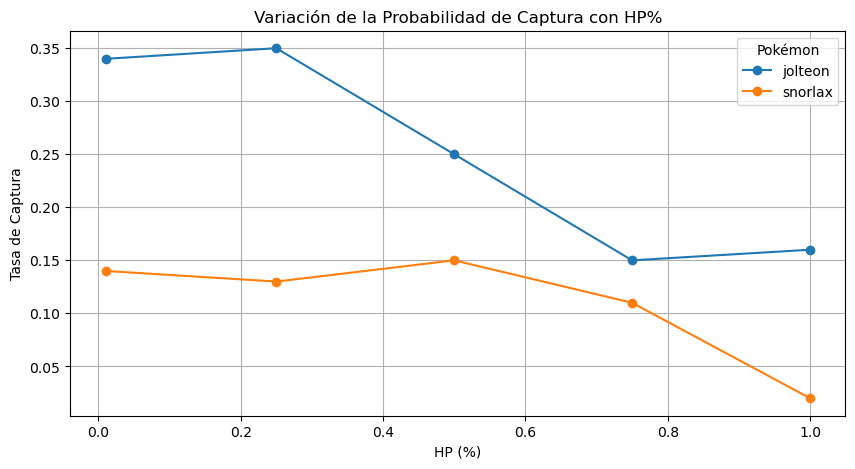

In [10]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect

# Cargar la configuración de Pokémon
pokemon_file = "pokemon.json"
with open(pokemon_file, "r") as f:
    pokemon_data = json.load(f)

# Lista de pokebolas y Pokémon disponibles
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]
pokemons_names = ["jolteon", "caterpie", "snorlax", "onix", "mewtwo"]
hp_percentages = [1.0, 0.75, 0.5, 0.25, 0.01]


# Inicializar la fábrica de Pokémon
pokemon_factory = PokemonFactory(pokemon_file)

# Función para probar la captura de Pokémon con diferentes HP%
def test_catch_hp_variation(pokemon_name, pokeball, hp_percentages, num_attempts=100):
    results = []

    for hp_percent in hp_percentages:
        success_count = 0
        probabilities = []

        for _ in range(num_attempts):
            pkmn = pokemon_factory.create(pokemon_name, 100, StatusEffect.NONE, hp_percent)
            success, capture_rate = attempt_catch(pkmn, pokeball)
            
            if success:
                success_count += 1
            probabilities.append(capture_rate)

        results.append([pokemon_name, hp_percent, success_count / num_attempts, np.mean(probabilities)])
    
    return results

# Definir Pokémon a evaluar y pokébola usada
selected_pokemons = ["jolteon", "snorlax"]
pokeball_used = "ultraball"

# Ejecutar el análisis para los Pokémon seleccionados
hp_results = []
for pkmn in selected_pokemons:
    hp_results.extend(test_catch_hp_variation(pkmn, pokeball_used, hp_percentages))

# Crear DataFrame con los resultados
df_hp_results = pd.DataFrame(hp_results, columns=["Pokemon", "HP%", "Success Rate", "Avg Capture Probability"])

# Mostrar resultados en consola
print(df_hp_results)

# Generar gráfico de líneas para visualizar la relación HP% vs Probabilidad de Captura
plt.figure(figsize=(10, 5))

for pokemon in selected_pokemons:
    subset = df_hp_results[df_hp_results["Pokemon"] == pokemon]
    plt.plot(subset["HP%"], subset["Success Rate"], marker='o', linestyle='-', label=pokemon)

# Etiquetas y título
plt.xlabel("HP (%)")
plt.ylabel("Tasa de Captura")
plt.title("Variación de la Probabilidad de Captura con HP%")
plt.legend(title="Pokémon")
plt.grid(True)

# Mostrar el gráfico
plt.show()